In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math

In [3]:
data=pd.read_csv("train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#loading all the data into numpy arrays

data=np.array(data)
m,n=data.shape
np.random.shuffle(data)

data_dev=data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [24]:
def init_params():
    W1 = np.random.randn(128, 784) * np.sqrt(2. / 784)  # He initialization for the first hidden layer
    b1 = np.zeros((128, 1))
    W2 = np.random.randn(10, 128) * np.sqrt(2. / 128)   # He initialization for the second hidden layer
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2


def ReLU(Z):
    return np.maximum(Z,0)

def leaky_ReLU(Z, alpha=0.01):
    return np.maximum(alpha*Z, Z)

def ELU(Z, alpha=1.0):
    return np.where(Z > 0, Z, alpha * (np.exp(Z) - 1))

def GELU(Z):
    return 0.5 * Z * (1 + np.tanh(np.sqrt(2 / np.pi) * (Z + 0.044715 * Z**3)))


def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1= W1.dot(X) +b1
    A1= GELU(Z1)
    Z2= W2.dot(A1) +b2
    A2= softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y=np.zeros((Y.size, Y.max() +1))
    one_hot_Y[np.arange(Y.size), Y]=1
    one_hot_Y= one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0

def deriv_leaky_ReLU(Z, alpha=0.01):
    return np.where(Z > 0, 1, alpha)

def deriv_ELU(Z, alpha=1.0):
    return np.where(Z > 0, 1, alpha * np.exp(Z))

def deriv_GELU(Z):
    tanh_term = np.tanh(np.sqrt(2 / np.pi) * (Z + 0.044715 * Z**3))
    return 0.5 * (1 + tanh_term + Z * (1 - tanh_term**2) * (np.sqrt(2 / np.pi) * (1 + 0.134145 * Z**2)))


def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y= one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/ m* dZ2.dot(A1.T)
    db2 = 1/ m* np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_GELU(Z1)
    dW1 = 1/ m* dZ1.dot(X.T)
    db1 = 1/ m* np.sum(dZ1)
    return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [25]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if (i % 10 == 0): 
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2
        


In [26]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
[7 3 3 ... 0 9 3] [0 9 7 ... 1 9 4]
Accuracy:  0.10165853658536585
Iteration:  10
[0 9 7 ... 1 9 4] [0 9 7 ... 1 9 4]
Accuracy:  0.6697317073170732
Iteration:  20
[0 9 7 ... 1 9 4] [0 9 7 ... 1 9 4]
Accuracy:  0.7744878048780488
Iteration:  30
[0 9 7 ... 1 9 4] [0 9 7 ... 1 9 4]
Accuracy:  0.8148048780487804
Iteration:  40
[0 9 7 ... 1 9 4] [0 9 7 ... 1 9 4]
Accuracy:  0.8365121951219512
Iteration:  50
[0 9 7 ... 1 9 4] [0 9 7 ... 1 9 4]
Accuracy:  0.8513414634146341
Iteration:  60
[0 9 7 ... 1 9 4] [0 9 7 ... 1 9 4]
Accuracy:  0.860390243902439
Iteration:  70
[0 9 7 ... 1 9 4] [0 9 7 ... 1 9 4]
Accuracy:  0.8675853658536585
Iteration:  80
[0 9 7 ... 1 9 4] [0 9 7 ... 1 9 4]
Accuracy:  0.873609756097561
Iteration:  90
[0 9 7 ... 1 9 4] [0 9 7 ... 1 9 4]
Accuracy:  0.8777317073170732
Iteration:  100
[0 9 7 ... 1 9 4] [0 9 7 ... 1 9 4]
Accuracy:  0.8815609756097561
Iteration:  110
[0 9 7 ... 1 9 4] [0 9 7 ... 1 9 4]
Accuracy:  0.8849512195121951
Iteration:  120
[0 9 7 ... 1

In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [2]
Label:  2


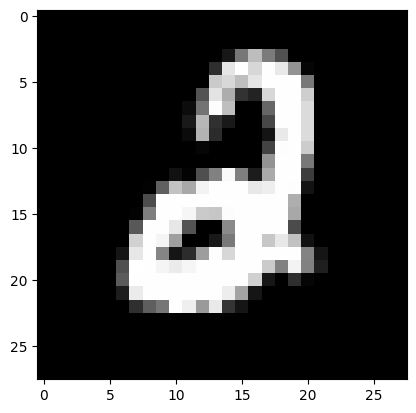

In [10]:
test_prediction(380, W1, b1, W2, b2)